In [9]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../processed_data/data.csv", index_col = 0)

In [11]:
place_name = "Yerevan, Armenia"
graph = ox.graph_from_place(place_name, network_type='all')

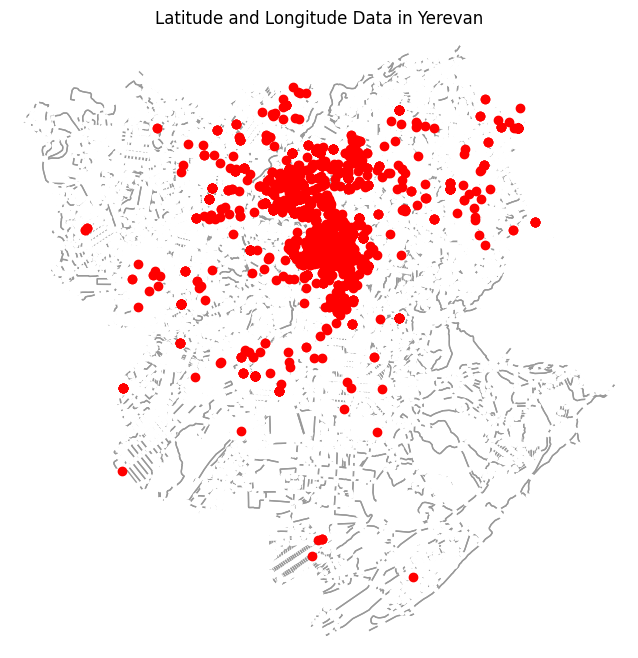

In [16]:
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.title('Latitude and Longitude Data in Yerevan')
plt.axis('off')
ax.scatter(data['latitude'], data['longitude'], c='red', zorder=2)
plt.show()